#### Reference: https://www.proquest.com/docview/2557143230

## Illuatration

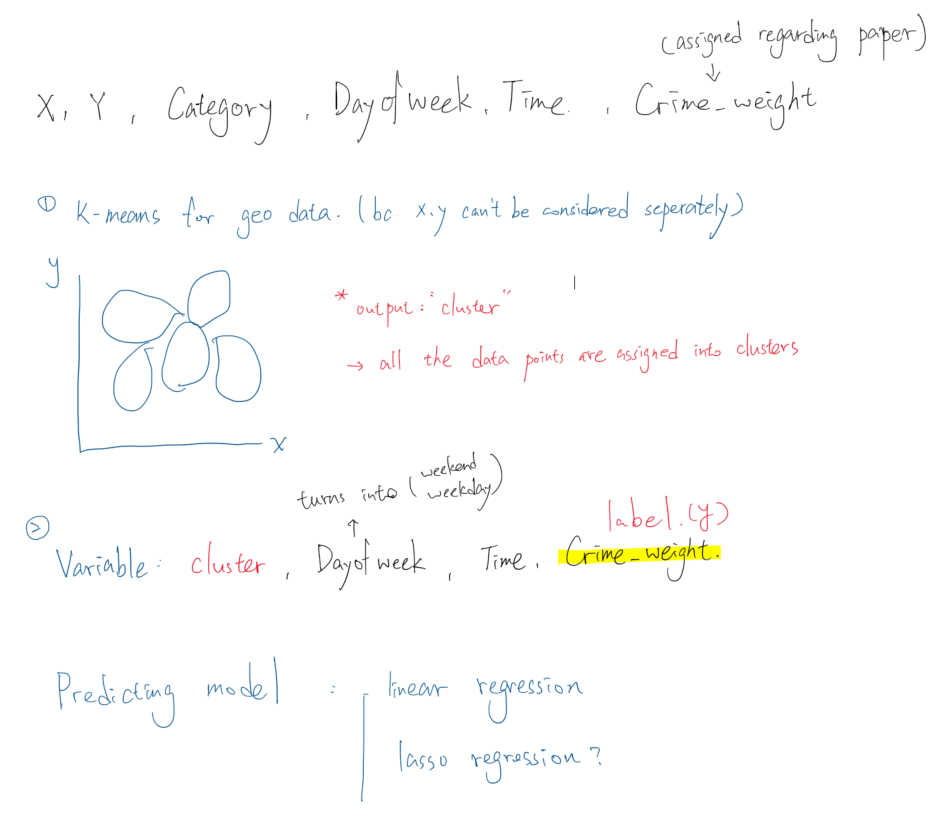
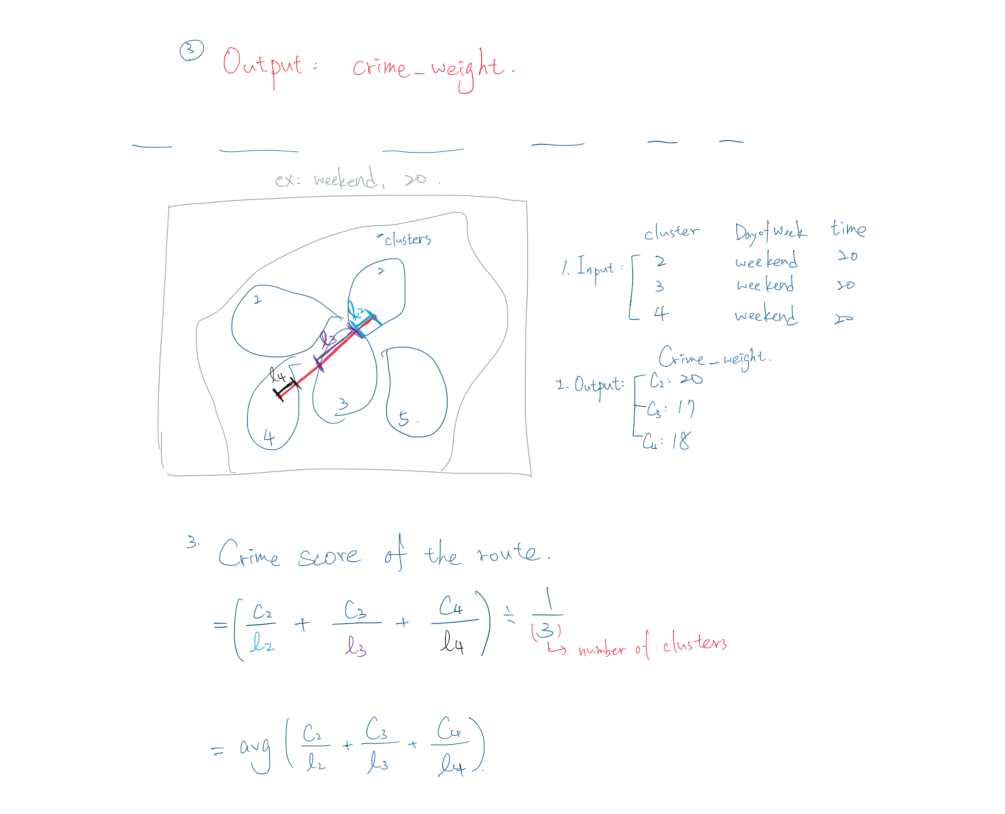

In [3]:
!pip3 install seaborn
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [4]:
df = pd.read_csv('processed_data.csv', index_col=0)
df = df.reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_data.csv'

## K-means cluster for x, y

In [ ]:
geo_df = df[['X', 'Y']]
geo_df

In [ ]:
# standardize
from sklearn.preprocessing import StandardScaler
s_geo_df = pd.DataFrame(StandardScaler().fit_transform(geo_df), columns=['X', 'Y'])
s_geo_df

In [ ]:
# elbow method (find the best number of clusters)
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1024)
    kmeans.fit(s_geo_df)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 6 clusters

In [5]:
# final model
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 1024)
cluster = kmeans.fit_predict(s_geo_df)

NameError: name 's_geo_df' is not defined

In [6]:
tmp_df = pd.DataFrame(cluster, columns=['cluster'])
result_df = pd.concat([geo_df,tmp_df], axis=1)
result_df

NameError: name 'cluster' is not defined

In [7]:
# visualization of the clusters
import seaborn as sns
sns.lmplot('X', 'Y', data=result_df, hue='cluster', fit_reg=False)

plt.show()

NameError: name 'result_df' is not defined

In [8]:
df = pd.concat([df,tmp_df], axis=1)

NameError: name 'df' is not defined

In [9]:
df.to_csv('clustered_data.csv')

NameError: name 'df' is not defined

## build the model for predicting crime score with cluster
- linear regression
- lasso regression

**cross validation(could do k-fold or leave-one-out)**

In [10]:
df = pd.read_csv('clustered_data.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'clustered_data.csv'

In [11]:
df = df[['DayOfWeek', 'Time', 'crime_weight', 'cluster']]
df[['cluster']] = df[['cluster']].astype(str)
df.info()
df

NameError: name 'df' is not defined

In [12]:
sns.pairplot(data=df,
             # Use kde for the diagonal subplots
             diag_kind='kde',
             hue='cluster',
             plot_kws=dict(
                 size=.5,
                 alpha=.5,
             ))

NameError: name 'df' is not defined

In [13]:
# get frequency of each day
cate_count_df = df.groupby('DayOfWeek').count().sort_values(by=['Time'])
fig, axes = plt.subplots(figsize=(10,5), dpi=80)
plt.bar(cate_count_df.index, cate_count_df.Time)

NameError: name 'df' is not defined

In [14]:
# cause as the previous plot shows, there is a slightly difference between Saturday&Friday vs the rest
df.loc[df['DayOfWeek'] == 'Saturday', 'DayOfWeek'] = 'weekend'
df.loc[df['DayOfWeek'] == 'Friday', 'DayOfWeek'] = 'weekend'
df.loc[df['DayOfWeek'] != 'weekend', 'DayOfWeek'] = 'weekday'

NameError: name 'df' is not defined

In [15]:
# encoded for regression model
encoded_df = pd.get_dummies(df)
encoded_df

NameError: name 'df' is not defined

In [100]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(encoded_df, test_size=0.2, random_state=1024)

x_train, x_test = train.copy().drop(columns='crime_weight'), test.copy().drop(columns='crime_weight')
y_train, y_test = train['crime_weight'], test['crime_weight']

## linear regression

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
print("Model weights: ")
print(model.coef_)


y_test_pred = model.predict(x_test)


mse = mean_squared_error(y_test, y_test_pred)
print('Testing MSE: %8.15f' % mse)
model.score(x_train, y_train)
model.score(x_test, y_test)

NameError: name 'x_train' is not defined

In [19]:
# cross validation

## lasso regression

- here is a document talks about lasso model selection: AIC-BIC / cross-validation
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html
- because we don't have many x variables, we could just use AIC or cross-validation for model selection (priority: cross-validation; if you don't have time, just forget about AIC lol)

In [20]:
# use the same datasets in linear regression section